## Simple Linear Regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the dataset:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [4]:
df.shape

(23, 2)

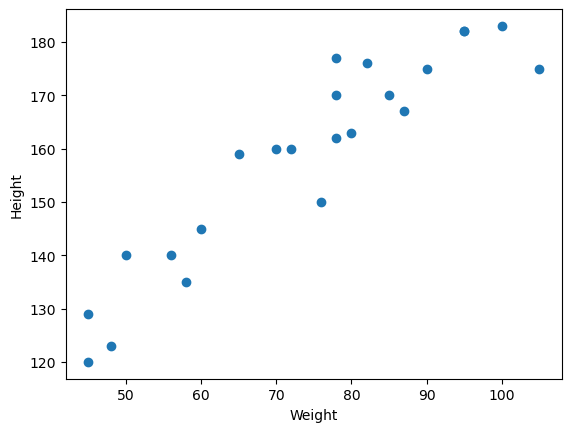

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

#### 1. Divide dataset into dependant and independent dataset:

In [6]:
X = df[['Weight']]    #independent feature.
y = df['Height']     #dependent feature.


In [7]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [8]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

### 2. Train test split:

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
X.shape

(23, 1)

In [12]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

### Here X train is input records and y train is output records. simillarly x test are input records and x test are output rrecords

### 3. Standardize the data: 
Here for height and weight have different units and different values.
Scaling is necessary in machine learning models because most algorithms don’t treat features equally if they are on very different scales. Here’s why it matters:
#### Only train independant feature scaling is done.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here fit will calculate mean and standard deviation and transform will apply z score on each value of X_train.  
and in test data we do only transform. because we dont use mean and standard devation calculated in fit transform for test data. reason is our model should not know anything about the test data. it should have information only about train data.

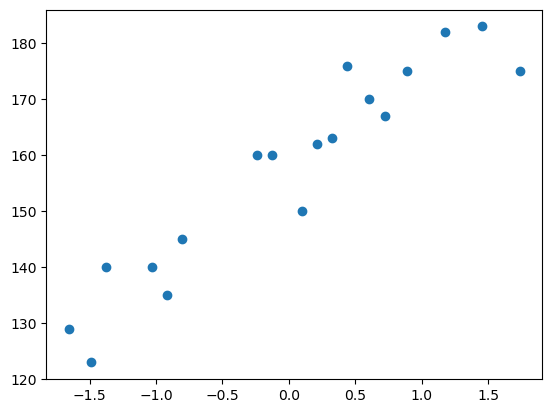

In [17]:
plt.scatter(X_train,y_train)
plt.show()

### Train the simple Linear regression model:

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression() 

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


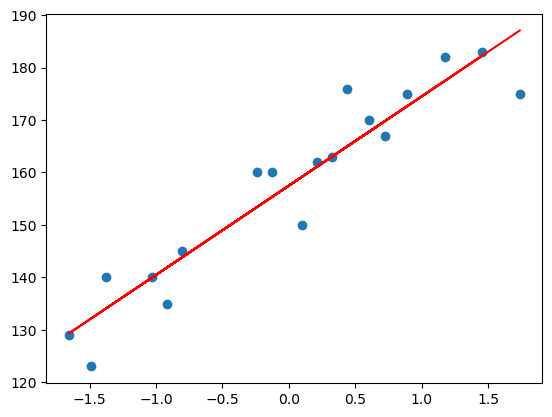

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='r')
plt.show()

In [23]:
y_pred_test = regressor.predict(X_test)


In [24]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

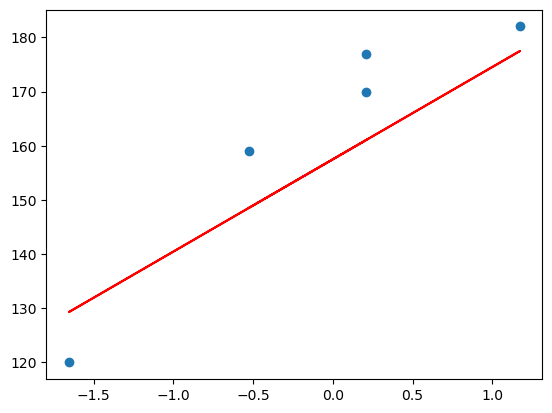

In [25]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='r')
plt.show()

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(f'Mean squared error: {mse}')
print(f'Mean absolute error: {mae}')
print(f'Root Mean squared error: {rmse}')


Mean squared error: 109.77592599051654
Mean absolute error: 9.822657814519227
Root Mean squared error: 10.477400726827076


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination  
SSR	=	sum of squares of residuals  
SST	=	total sum of squares

In [28]:
from sklearn.metrics import r2_score

In [30]:
score= r2_score(y_test,y_pred_test)

In [31]:
score

0.7769869860423441

### Adjusted R Square:

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model  
n: The number of observations  
k: The number of predictor variables

In [32]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

#### always remember r2 value always greater than adjusted r2:

In [33]:
regressor

LinearRegression()

In [34]:
#new data point and weight = 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [36]:
scaled_weight[0]

array([0.32350772])

In [37]:
print(f'The height prediction for weight = 80 is: {regressor.predict([scaled_weight[0]])}')

The height prediction for weight = 80 is: [163.01076266]


### Assumptions required in the linear regression:

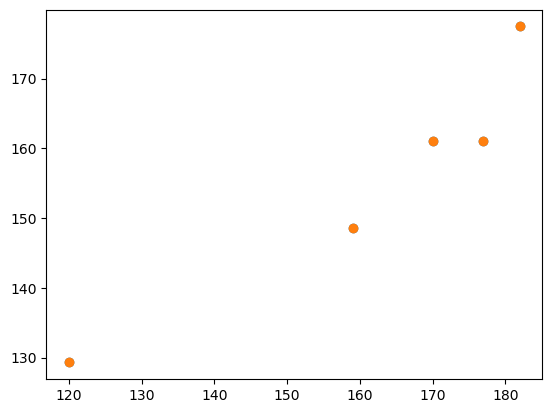

In [39]:
plt.scatter(y_test,y_pred_test)
plt.show()

#### plot is linearly distributed means you done very good predictions.

### assumption 2: Residuals:

In [40]:
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\2998573979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)


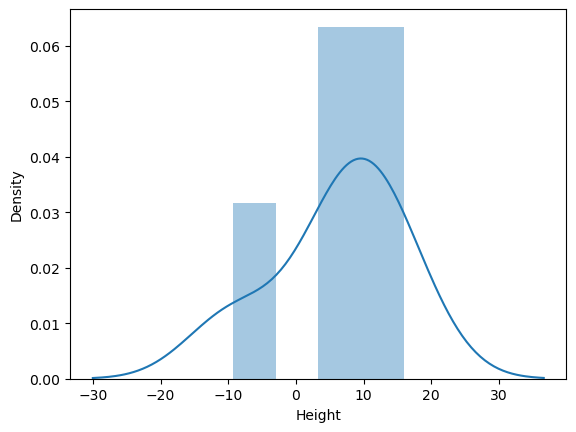

In [43]:
import seaborn as sns
sns.distplot(residuals,kde = True)
plt.show()

#### from this we conclude that we create a better model.

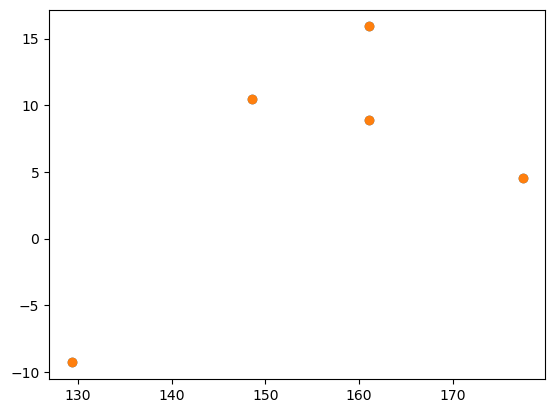

In [45]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)
plt.show()

#### It shows linear distribution. means our model is very good.